<a href="https://colab.research.google.com/github/yashwantS2/Placement-Prediction-Model/blob/main/placements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/placement.csv')

In [ ]:
df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
df.info

<bound method DataFrame.info of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
#EDA

In [ ]:
import matplotlib.pyplot as plt

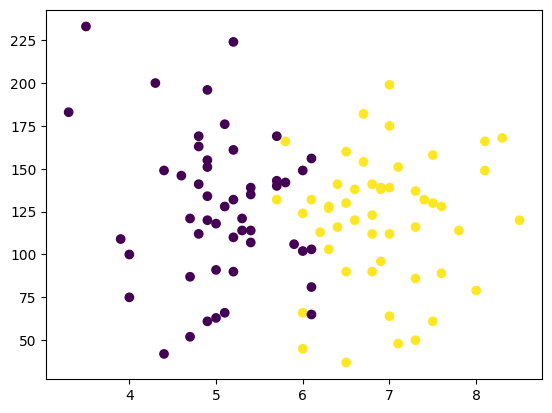

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
#Extract Input and Output

x = df.iloc[:,0:2] #independent var
y = df.iloc[:,-1] #dependent variable

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
x_train

,cgpa,iq
99,6.2,113.0
92,5.2,110.0
76,4.9,155.0
14,6.1,103.0
0,6.8,123.0
...,...,...
43,6.8,141.0
22,4.9,120.0
72,7.3,116.0
15,5.1,176.0


In [ ]:
x_test


,cgpa,iq
83,7.5,130.0
30,7.6,128.0
56,6.1,65.0
24,4.7,121.0
16,5.2,224.0
23,4.7,87.0
2,5.3,121.0
27,6.0,124.0
28,5.2,90.0
13,6.4,116.0


In [ ]:
y_train

,placement
99,1
92,0
76,0
14,0
0,1
...,...
43,1
22,0
72,1
15,0


In [ ]:
y_train

,placement
99,1
92,0
76,0
14,0
0,1
...,...
43,1
22,0
72,1
15,0


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
#transfor the dataset
x_test = sc.transform(x_test)


In [ ]:
x_train


array([[ 0.16981077, -0.27485148],
       [-0.69853978, -0.35042165],
       [-0.95904494,  0.7831308 ],
       [ 0.08297572, -0.52675203],
       [ 0.6908211 , -0.02295094],
       [ 0.95132627,  0.68237059],
       [ 1.21183143,  0.20375955],
       [ 0.86449121, -0.30004154],
       [ 1.12499638,  0.32970982],
       [ 0.43031594, -0.85422273],
       [ 0.6908211 , -0.85422273],
       [ 0.77765616,  0.35489988],
       [-0.2643645 ,  1.13579157],
       [ 1.29866649, -1.58473431],
       [-0.95904494, -1.58473431],
       [ 0.95132627, -1.91220502],
       [-0.87220989, -0.82903268],
       [ 1.12499638, -1.86182491],
       [ 0.60398605,  0.75794075],
       [-0.00385934, -0.55194208],
       [ 1.81967682,  1.0602214 ],
       [-0.09069439, -0.45118186],
       [-1.74056044, -0.60232219],
       [ 0.51715099,  0.35489988],
       [-0.2643645 ,  0.40527999],
       [ 0.08297572, -1.08093322],
       [-0.2643645 ,  0.48085015],
       [-0.95904494,  0.68237059],
       [ 1.29866649,

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression()

In [ ]:
#this model training -> fit
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Evaluate the model
#We find the Accuracy easily
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_test

,placement
83,1
30,1
56,0
24,0
16,0
23,0
2,0
27,1
28,0
13,1


In [ ]:
# Now we will find the accuracy of this Model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [69]:
#to visualise this
from mlxtend.plotting import plot_decision_regions

<Axes: >

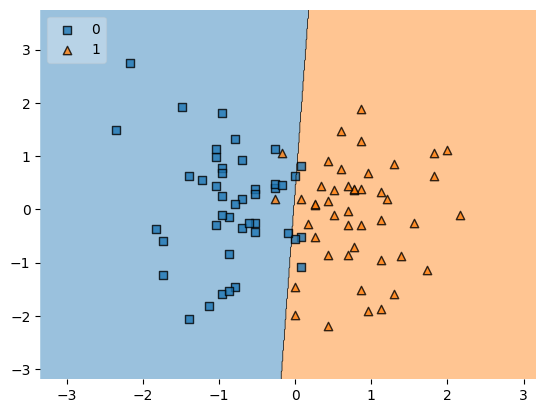

In [70]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)
# we have not used .values in x_train because numpy array standardised  it scaler

In [71]:
#now deploy on website
import pickle

In [72]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
# Project Completed